<a href="https://colab.research.google.com/github/saadiazahoor/git-tutorial/blob/master/machine_learning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = [10, 5]
warnings.simplefilter(action="ignore", category=FutureWarning)


In [19]:
full_data=sns.load_dataset("titanic")
full_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
full_data.loc[[0,3]]

In [ ]:

full_data[["age","fare"]]

<Axes: >

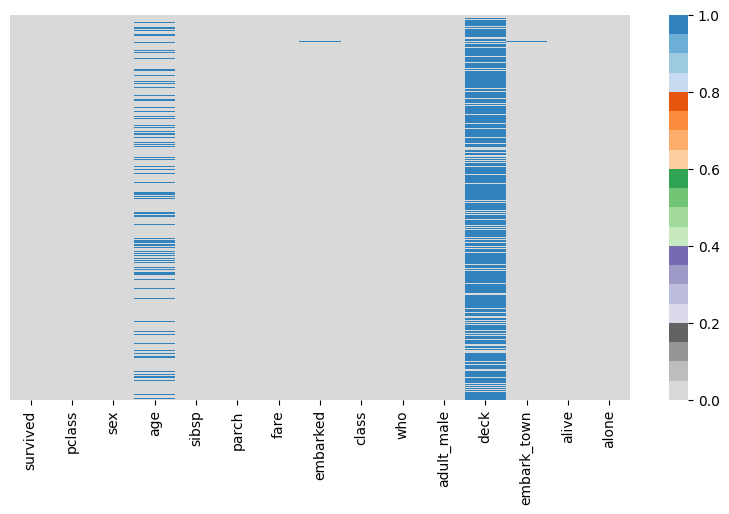

In [17]:
sns.heatmap(full_data.isnull(),yticklabels=False,cbar=True,cmap="tab20c_r")

In [20]:
def impute_age(row):
    age = row['age']
    pclass = row['pclass']

    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

# Applying the imputation function to the 'age' column using apply and axis=1
full_data['age'] = full_data.apply(impute_age, axis=1)

print(full_data)


     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female  24.0      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [ ]:

full_data.head()

In [21]:
full_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,24.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [22]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
#identify catagorical
full_data.select_dtypes(['category']).columns

Index(['class', 'deck'], dtype='object')

In [26]:
full_data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [22]:
objcat=["sex","embarked","alive"]
for i in objcat:
  full_data[i]=full_data[i].astype("category")

In [31]:
full_data[["sex","embarked"]].dtypes

sex         category
embarked    category
dtype: object

In [ ]:


# Load the Titanic dataset (replace 'titanic.csv' with the actual file path)

# Check the data types before conversion
print("Before Conversion:")
print(full_data[['Sex', 'Embarked']].dtypes)

# Convert 'Sex' and 'Embarked' columns to 'category'
full_data['Sex'] = full_data['Sex'].astype('category')
full_data['Embarked'] = full_data['Embarked'].astype('category')

# Check the data types after conversion
print("\nAfter Conversion:")
print(full_data[['Sex', 'Embarked']].dtypes)


In [23]:
full_data.drop("embark_town",axis=1,inplace=True)

In [ ]:
ordinal_mapping = {'sex': 1, 'embarked': 2, 'alive': 3}
df['category_column_encoded'] = df['category_column'].map(ordinal_mapping)


In [24]:
sex=pd.get_dummies(full_data['sex'],drop_first=True)
embarked=pd.get_dummies(full_data['embarked'],drop_first=True)
alive=pd.get_dummies(full_data['alive'],drop_first=True)
class1=pd.get_dummies(full_data['class'],drop_first=True)



In [25]:
full_data=pd.concat([full_data,sex,embarked,alive,class1],axis=1)
full_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone,male,Q,S,yes,Second,Third
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,no,False,1,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,yes,False,0,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,yes,True,0,0,1,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,yes,False,0,0,1,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,no,True,1,0,1,0,0,1


In [26]:
full_data.drop(["sex","embarked"],axis=1,inplace=True)

In [27]:
full_data.drop(['class','alive'],axis=1,inplace=True)

In [28]:
full_data.drop('deck',axis=1,inplace=True)

In [29]:
full_data

,survived,pclass,age,sibsp,parch,fare,who,adult_male,alone,male,Q,S,yes,Second,Third
0,0,3,22.0,1,0,7.2500,man,True,False,1,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,woman,False,False,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,woman,False,True,0,0,1,1,0,1
3,1,1,35.0,1,0,53.1000,woman,False,False,0,0,1,1,0,0
4,0,3,35.0,0,0,8.0500,man,True,True,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,man,True,True,1,0,1,0,1,0
887,1,1,19.0,0,0,30.0000,woman,False,True,0,0,1,1,0,0
888,0,3,24.0,1,2,23.4500,woman,False,False,0,0,1,0,0,1
889,1,1,26.0,0,0,30.0000,man,True,True,1,0,0,1,0,0


In [35]:
full_data.drop('who',axis=1,inplace=True)

In [36]:
full_data.shape

(891, 14)

# model training

In [37]:
x=full_data.drop('survived',axis=1)
y=full_data['survived']

In [38]:
x.shape

(891, 13)

In [39]:
y.shape

(891,)

In [41]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x) #it calculates mean and sd of values
x_transform = pre_process.fit_transform(x)      #it subtract mean and devides by  sd.

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=101)

In [43]:
x_train.shape

(712, 13)

In [44]:
x_train

,pclass,age,sibsp,parch,fare,adult_male,alone,male,Q,S,yes,Second,Third
733,2,23.0,0,0,13.0000,True,True,1,0,1,0,1,0
857,1,51.0,0,0,26.5500,True,True,1,0,1,1,0,0
81,3,29.0,0,0,9.5000,True,True,1,0,1,1,0,1
319,1,40.0,1,1,134.5000,False,False,0,0,0,1,0,0
720,2,6.0,0,1,33.0000,False,False,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,3,19.0,0,0,14.5000,True,True,1,0,1,0,0,1
838,3,32.0,0,0,56.4958,True,True,1,0,1,1,0,1
337,1,41.0,0,0,134.5000,False,True,0,0,0,1,0,0
523,1,44.0,0,1,57.9792,False,False,0,0,0,1,0,0


In [45]:
from sklearn.linear_model import LogisticRegression
print("Logistic Regression")
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

Logistic Regression


LogisticRegression()

In [48]:
from sklearn.metrics import accuracy_score
y_pred_log_reg=log_reg.predict(x_test)
print('logistic regression')
print('--'*30)
log_reg_accuracy=round(accuracy_score(y_test,y_pred_log_reg)*100,2)
print('Accuracy',log_reg_accuracy,'%')

logistic regression
------------------------------------------------------------
Accuracy 100.0 %


In [51]:
from sklearn.tree import DecisionTreeClassifier
print('Decision Tree Classifier')
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)


Decision Tree Classifier


DecisionTreeClassifier()

In [52]:
from sklearn.metrics import accuracy_score
y_pred_dtree=dtree.predict(x_test)
print('Decision Tree Classifier')
print('--'*30)
dtree_accuracy=round(accuracy_score(y_test,y_pred_dtree)*100,2)
print('Accuracy',dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 100.0 %


In [53]:
from sklearn.ensemble import RandomForestClassifier
print("RandomForest Classifier")
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForest Classifier


RandomForestClassifier()

In [54]:
from sklearn.metrics import accuracy_score
y_pred_rfc=rfc.predict(x_test)
print('random forest classifier')
print('--'*30)
rfc_accuracy=round(accuracy_score(y_test,y_pred_rfc)*100,2)
print("accuracy",rfc_accuracy,'%')


random forest classifier
------------------------------------------------------------
accuracy 100.0 %


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
print("gradient bosting classifier")
gbc= GradientBoostingClassifier()
gbc.fit(x_train,y_train)

gradient bosting classifier


GradientBoostingClassifier()

In [56]:
from sklearn.metrics import accuracy_score
y_pred_gbc=gbc.predict(x_test)
print('gradient boosting classifier')
print('--'*30)
gbc_accuracy=round(accuracy_score(y_test,y_pred_gbc)*100,2)
print('Accuracy',gbc_accuracy,'%')

gradient boosting classifier
------------------------------------------------------------
Accuracy 100.0 %


In [57]:
model_scores={
    "Logistic regression":log_reg_accuracy,
    "Decision tree classifier":dtree_accuracy,
    "Random forest classifier":rfc_accuracy,
    "Gradient boosting classsier":gbc_accuracy
}

sorted_scores=sorted(model_scores.items(),key=lambda x :x[1],reverse=True)
print("model ranking :")
for rank,(model_name,score)in enumerate(sorted_scores,start=1):
  print(f"{rank},{model_name}:{score}")

model ranking :
1,Logistic regression:100.0
2,Decision tree classifier:100.0
3,Random forest classifier:100.0
4,Gradient boosting classsier:100.0
